In [32]:

import pandas as pd
pd.set_option("display.max_columns",10)

train_bank = pd.read_csv('./train_public.csv')

print(train_bank.shape)
train_bank.head()

(10000, 39)


,loan_id,user_id,total_loan,year_of_loan,interest,...,f4,early_return,early_return_amount,early_return_amount_3mon,isDefault
0,1040418,240418,31818.18182,3,11.466,...,4.0,3,9927,0.0,0
1,1025197,225197,28000.00000,5,16.841,...,22.0,0,0,0.0,0
2,1009360,209360,17272.72727,3,8.900,...,19.0,0,0,0.0,0
3,1039708,239708,20000.00000,3,4.788,...,9.0,0,0,0.0,0
4,1027483,227483,15272.72727,3,12.790,...,4.0,0,0,0.0,0


<AxesSubplot:ylabel='isDefault'>

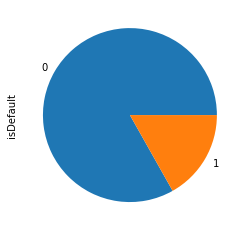

In [28]:
## 好坏样本的占比
train_bank.isDefault.value_counts().plot(kind='pie')


### 数据预处理

In [27]:
# 日期类型：issueDate 转换为pandas中的日期类型，加工出数值特征
train_bank['issue_date'] = pd.to_datetime(train_bank['issue_date'])
# 提取多尺度特征
train_bank['issue_date_y'] = train_bank['issue_date'].dt.year
train_bank['issue_date_m'] = train_bank['issue_date'].dt.month
# 提取时间diff # 转换为天为单位
base_time = datetime.datetime.strptime('2000-01-01', '%Y-%m-%d')   # 随机设置初始的基准时间
train_bank['issue_date_diff'] = train_bank['issue_date'].apply(lambda x: x-base_time).dt.days
train_bank.drop('issue_date', axis = 1, inplace = True)
train_bank.head()

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,employer_type,industry,work_year,house_exist,censor_status,use,post_code,region,debt_loan_ratio,del_in_18month,scoring_low,scoring_high,known_outstanding_loan,known_dero,pub_dero_bankrup,recircle_b,recircle_u,initial_list_status,app_type,earlies_credit_mon,title,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon,isDefault,issue_date_y,issue_date_m,issue_date_diff
0,1040418,240418,31818.18182,3,11.466,1174.91,C,政府机构,金融业,3 years,0,1,2,193,13,2.430000,0,556.363636,649.090909,3,0,0.0,7734.230769,91.800000,0,0,1-Dec,5,1,1.0,0.0,4.0,5.0,4.0,3,9927,0.0,0,2016,10,3410
1,1025197,225197,28000.00000,5,16.841,670.69,C,政府机构,金融业,10+ years,0,2,0,491,30,11.004545,1,715.000000,893.750000,3,0,0.0,31329.000000,54.800000,1,0,Apr-90,40642,1,7.0,0.0,4.0,45.0,22.0,0,0,0.0,0,2013,6,2192
2,1009360,209360,17272.72727,3,8.900,603.32,A,政府机构,公共服务、社会组织,10+ years,1,0,4,459,8,6.409091,0,774.545455,903.636364,5,0,0.0,18514.000000,57.692308,1,0,Oct-91,154,1,6.0,0.0,6.0,28.0,19.0,0,0,0.0,0,2014,1,2406
3,1039708,239708,20000.00000,3,4.788,602.30,A,世界五百强,文化和体育业,6 years,0,1,0,157,8,9.204545,0,750.000000,875.000000,3,0,0.0,20707.000000,42.600000,0,0,1-Jun,0,1,5.0,0.0,10.0,15.0,9.0,0,0,0.0,0,2015,7,2952
4,1027483,227483,15272.72727,3,12.790,470.31,C,政府机构,信息传输、软件和信息技术服务业,< 1 year,2,1,0,38,21,15.578182,0,609.090909,710.606061,15,0,0.0,14016.153850,30.461538,0,0,2-May,0,1,10.0,0.0,6.0,15.0,4.0,0,0,0.0,0,2016,7,3318


In [30]:
train_bank['employer_type'].value_counts()

普通企业       4610
政府机构       2474
幼教与中小学校    1053
上市企业        958
世界五百强       542
高等教育机构      363
Name: employer_type, dtype: int64

In [31]:
train_bank['industry'].value_counts()

金融业                1629
电力、热力生产供应业         1248
公共服务、社会组织          1065
住宿和餐饮业              907
信息传输、软件和信息技术服务业     808
文化和体育业              793
建筑业                 704
房地产业                554
采矿业                 506
交通运输、仓储和邮政业         492
农、林、牧、渔业            466
制造业                 302
批发和零售业              279
国际组织                247
Name: industry, dtype: int64

In [ ]:
emp_type_dict = dict(zip(employer_type, [0,1,2,3,4,5]))
industry_dict = dict(zip(industry, [i for i in range(15)]))

In [ ]:
train_bank['work_year'].fillna('10+ years', inplace=True)
train2_data['work_year'].fillna('10+ years', inplace=True)

work_year_map = {'10+ years': 10, '2 years': 2, '< 1 year': 0, '3 years': 3, '1 year': 1,
     '5 years': 5, '4 years': 4, '6 years': 6, '8 years': 8, '7 years': 7, '9 years': 9}
train_bank['work_year']  = train_bank['work_year'].map(work_year_map)
train2_data['work_year']  = train2_data['work_year'].map(work_year_map)

train_bank['class'] = train_bank['class'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})
train2_data['class'] = train2_data['class'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})

train_bank['employer_type'] = train_bank['employer_type'].map(emp_type_dict)
train2_data['employer_type'] = train2_data['employer_type'].map(emp_type_dict)

train_bank['industry'] = train_bank['industry'].map(industry_dict)
train2_data['industry'] = train2_data['industry'].map(industry_dict)

In [ ]:
# 日期类型：issueDate，earliesCreditLine
#train[cat_features]
# 转换为pandas中的日期类型
test_data['issue_date'] = pd.to_datetime(test_data['issue_date'])
# 提取多尺度特征
test_data['issue_date_y'] = test_data['issue_date'].dt.year
test_data['issue_date_m'] = test_data['issue_date'].dt.month
# 提取时间diff
# 设置初始的时间
base_time = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
# 转换为天为单位
test_data['issue_date_diff'] = test_data['issue_date'].apply(lambda x: x-base_time).dt.days
test_data[['issue_date', 'issue_date_y', 'issue_date_m', 'issue_date_diff']]
test_data.drop('issue_date', axis = 1, inplace = True)
test_data['work_year'].fillna('10+ years', inplace=True)

work_year_map = {'10+ years': 10, '2 years': 2, '< 1 year': 0, '3 years': 3, '1 year': 1,
     '5 years': 5, '4 years': 4, '6 years': 6, '8 years': 8, '7 years': 7, '9 years': 9}
test_data['work_year']  = test_data['work_year'].map(work_year_map)
test_data['class'] = test_data['class'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})
test_data['employer_type'] = test_data['employer_type'].map(emp_type_dict)
test_data['industry'] = test_data['industry'].map(industry_dict)

## 模型使用
1) LigthGBM
2) NN

##### 使用internet和bank数据共同特征总量训练

In [ ]:
import lightgbm
from sklearn import metrics

X_train1 = train_bank.drop(['is_default','earlies_credit_mon','loan_id','user_id'], axis = 1, inplace = False)
y_train1 = train_bank['is_default']

X_train2 = train2_data.drop(['is_default','earlies_credit_mon','loan_id','user_id'], axis = 1, inplace = False)
y_train2 = train2_data['is_default']

X_train = pd.concat([X_train1, X_train2])
y_train = pd.concat([y_train1, y_train2])

X_test = test_data.drop(['earlies_credit_mon','loan_id','user_id'], axis = 1, inplace = False)




from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_curve,auc,roc_auc_score,mean_squared_error
from sklearn.model_selection import train_test_split

def model_metrics(model, x, y):
    """ 评估 """
    #yhat = model.predict(x)
    #yhat = (model.predict_proba(x)[:,1] >0.5*0.5)*1
    yhat = model.predict_proba(x)[:,1]
    return roc_auc_score(y, yhat)

train_x, test_x, train_y, test_y = train_test_split(X_train1, y_train1,test_size=0.7, random_state=0)

# 利用Internet数据预训练模型1
lgb=lightgbm.LGBMClassifier(n_estimators=200, class_weight= 'balanced',metric = 'AUC')
lgb.fit(train_x, train_y)
print(model_metrics(lgb,test_x,test_y))
print(model_metrics(lgb,X_train2,y_train2))
print(model_metrics(lgb,X_train1,y_train1))

0.8010256624678804
0.8191020532150323
0.8085023187060225


In [ ]:
# lgb200=lightgbm.LGBMClassifier(n_estimators=1000, class_weight= 'balanced')
# lgb200.fit(train_x, train_y)

# lgb100=lightgbm.LGBMClassifier(n_estimators=500, class_weight= 'balanced')
# lgb100.fit(train_x, train_y)

# lgb50=lightgbm.LGBMClassifier(n_estimators=200, class_weight= 'balanced')
# lgb50.fit(train_x, train_y)

# yhat = lgb50.predict_proba(test_x)[:,1] + lgb100.predict_proba(test_x)[:,1] + lgb200.predict_proba(test_x)[:,1] 
# roc_auc_score(test_y, yhat)

LGBMClassifier(class_weight='balanced', n_estimators=200)

In [ ]:
pred = lgb.predict_proba(X_test)[:,1]
# submission
submission = pd.DataFrame({'id':test['loan_id'], 'isDefault':pred})
submission.to_csv('submission0.0.csv', index = None)

#### NN

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras import models
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 数据标准化
import numpy as np
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
def standardize(x): 
    return (x-mean_px)/std_px

In [ ]:
# 缺失值填补
X_train.fillna(0, inplace = True)
X_test.fillna(0, inplace = True)

In [ ]:
X_train_NN =(X_train - mean_px) / std_px
X_test_NN  = (X_test - mean_px) / std_px

X_train_NN = (X_train.values).astype('float32') # all pixel values
y_train_NN = y_train.astype('int32')

X_test_NN = (X_test.values).astype('float32') # all pixel values

In [ ]:
# 修改初始化、加归一层、加dropout、改用不同的metrics
seed = 43
np.random.seed(seed)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC

def auroc(y_true, y_pred):
    return tf.compat.v1.py_func(roc_auc_score, (y_true, y_pred), tf.double)

input_shape = X_train_NN.shape[1]
b_size = 1024
max_epochs = 10

import tensorflow.keras as K
init = K.initializers.glorot_uniform(seed=1)
simple_adam = K.optimizers.Adam(lr=0.001)

model = K.models.Sequential()
model.add(K.layers.Dense(units=256, input_dim=input_shape, kernel_initializer='he_normal', activation='relu',kernel_regularizer=l2(0.0001)))
model.add(K.layers.LayerNormalization())
model.add(K.layers.Dropout(0.3))
model.add(K.layers.Dense(units= 64, kernel_initializer='he_normal', activation='relu'))
model.add(K.layers.LayerNormalization())
model.add(K.layers.Dropout(0.3))
model.add(K.layers.Dense(units=1, kernel_initializer='he_normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=simple_adam, metrics=['accuracy',AUC(name='auc')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               8960      
_________________________________________________________________
layer_normalization (LayerNo (None, 256)               512       
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
layer_normalization_1 (Layer (None, 64)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6

In [ ]:
print("Starting NN training")
h = model.fit(X_train_NN, y_train_NN, batch_size=b_size, epochs=max_epochs, shuffle=True, verbose=1)
print("NN training finished")

Starting NN training
Epoch 1/10
743/743 [==============================] - 8s 9ms/step - loss: 0.5106 - accuracy: 0.8002 - auc: 0.5713
Epoch 2/10
743/743 [==============================] - 7s 9ms/step - loss: 0.4855 - accuracy: 0.8008 - auc: 0.6117
Epoch 3/10
743/743 [==============================] - 7s 9ms/step - loss: 0.4768 - accuracy: 0.8008 - auc: 0.6406
Epoch 4/10
743/743 [==============================] - 8s 10ms/step - loss: 0.4680 - accuracy: 0.8008 - auc: 0.6725
Epoch 5/10
743/743 [==============================] - 8s 10ms/step - loss: 0.4625 - accuracy: 0.8008 - auc: 0.6899
Epoch 6/10
743/743 [==============================] - 11s 15ms/step - loss: 0.4593 - accuracy: 0.8010 - auc: 0.6994
Epoch 7/10
743/743 [==============================] - 15s 21ms/step - loss: 0.4570 - accuracy: 0.8012 - auc: 0.7057
Epoch 8/10
743/743 [==============================] - 15s 21ms/step - loss: 0.4559 - accuracy: 0.8013 - auc: 0.7086
Epoch 9/10
743/743 [==============================] - 15s 2

In [ ]:
pred_NN = model.predict(X_test_NN)
pred_NN = [item[0] for item in pred_NN]

In [ ]:
model.save('NN_model.h5')
submission = pd.DataFrame({'id':test['loan_id'], 'is_default':pred_NN})
submission.to_csv('submission.csv', index = None)

# 其他尝试...